<a href="https://colab.research.google.com/github/vbhsharma7/Netflix-movies-and-tv-show-clustering-capstone/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

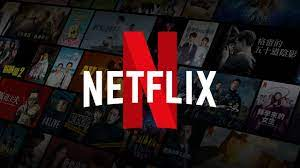

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read the data
df = pd.read_csv('/content/drive/MyDrive/Capstone netflix movies and tv shows - vibhu sharma/ NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# Basic info about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
# Shape of the data.
df.shape

(7787, 12)

**There are 7787 rows and 12 columns provided in the data**

In [6]:
# Fisrt 4 values.
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."


In [7]:
# stastical data of dataset
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [8]:
# Creating a copy of a dataset

df1 = df.copy()

**Data cleaning**

In [9]:
# Finding duplicates True = duplicated value
df1.duplicated().value_counts()

False    7787
dtype: int64

In [10]:
# Finding null values

df1.isnull().sum().sort_values(ascending = False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
#Replacing missing values in 'director' column with value 'unknown'
df1['director'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'cast' column with value 'unknown'
df1['cast'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'country' column with mode
df1['country']= df1['country'].fillna(df1['country'].mode()[0])

#Replacing missing values in 'rating' column with value most frequent rating i.e. mode
df1['rating'] = df1['rating'].fillna(df1['rating'].mode()[0])

# Dropping the null values in 'date_added'
df1 = df1[df1['date_added'].notna()]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


In [13]:
#checking the date format
df1.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."


**Exploratory Data Analysis:**

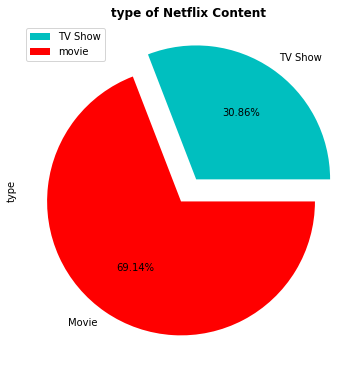

In [14]:
#plotting pie chart on type feature
df2=df1['type'].value_counts().sort_values()
myexplode=[0.1,0.1]
colour=['c','r']
label=['TV Show',"movie"]
df2.plot.pie( figsize=(6,8), colors=colour, fontsize=10,  explode=myexplode, autopct='%1.2f%%')
plt.title('type of Netflix Content',fontweight="bold")
plt.legend(labels=label)
plt.show()

Text(0, 0.5, 'Country Name')

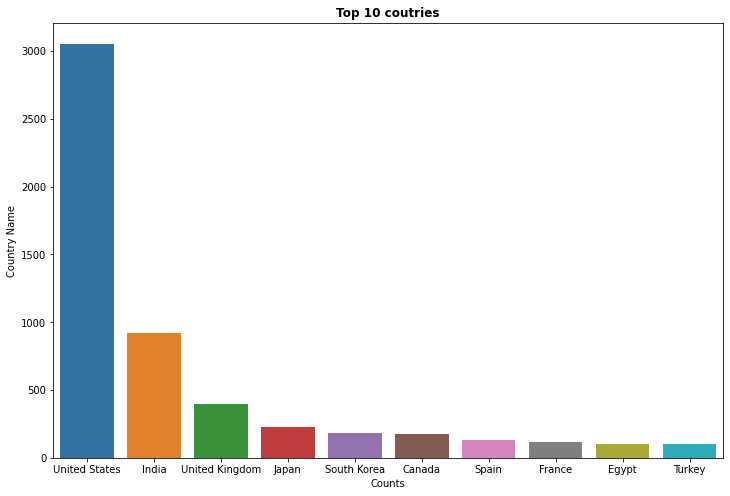

In [15]:
# Top 10 countries on Netflix
plt.figure(figsize=(12,8))
ax=sns.countplot(x='country',data=df1,order=df1['country'].value_counts().index[0:10])

plt.title('Top 10 coutries',fontweight="bold")
plt.xlabel('Counts')
plt.ylabel('Country Name')

**The United States has the most number of content on Netflix by a huge margin followed by India**

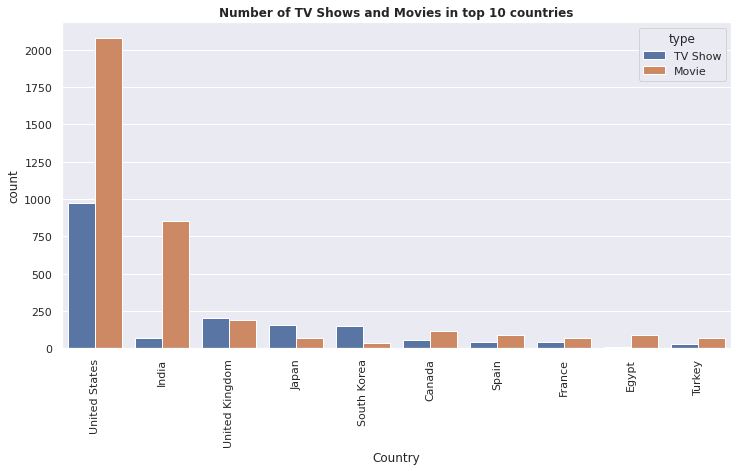

In [16]:
#Number of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(12,6))
ax=sns.countplot(x="country",data= df1,hue= "type",order = df1['country'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top 10 countries",fontweight="bold")
plt.show()

**Most of the countries have more movies than TV shows but for South Korea and Japan it's the opposite. It maybe because KDramas and Anime are more popular in these two countries respectively.**

**TOP 10 DIRECTORS**

In [17]:

#removing unknown 
df3=df1.copy()

df3=df3[df1['director']!='unknown']

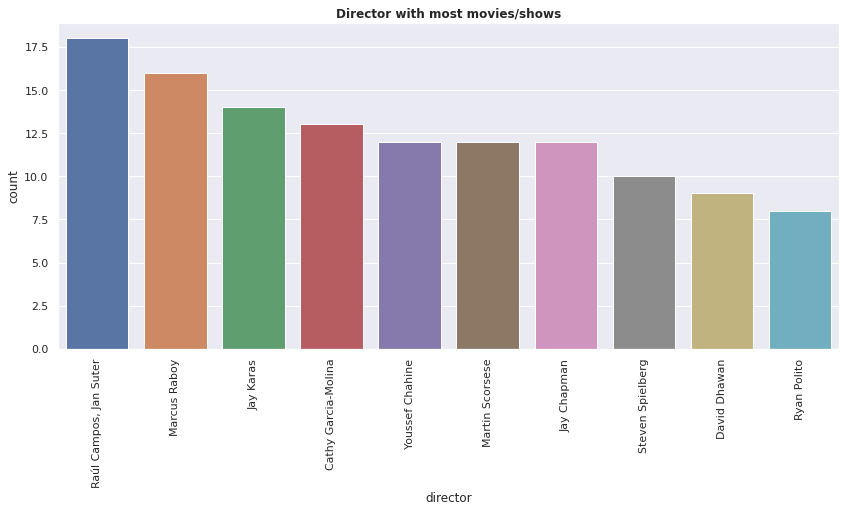

In [18]:
#plot for top 10 director

plt.figure(figsize = (14,6))
sns.countplot(x='director',data=df3,order=df3.director.value_counts().head(10).index)
plt.title('Director with most movies/shows',fontweight="bold")
plt.xticks(rotation = 90)
plt.show()

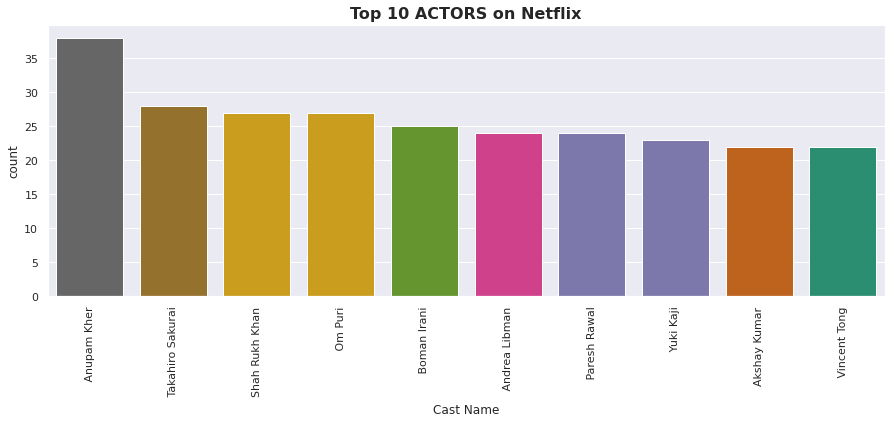

In [19]:
#getting plot for top actors

#splitting into list
df1['cast_name'] = df1['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
#count movies for each actor
for i in df1['cast_name']: 
   cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename( columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]

plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top 10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xlabel('Cast Name')
plt.xticks(rotation=90)
plt.show()